# Crop Recommendation


In [1]:
#Eda

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\jayan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data= pd.read_csv('C:\\Users\\jayan\\Downloads\\Crop_recommendation.csv')

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


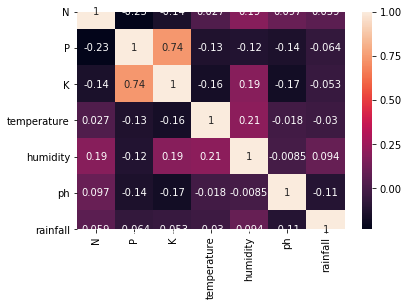

In [8]:
sns.heatmap(data.corr(),annot=True)

In [39]:
df= data.groupby('label')[['K','P','N']].mean()
df['sum of minerals'] = df.K + df. N + df.P

In [40]:
df

,K,P,N,sum of minerals
label,,,,
apple,199.89,134.22,20.80,354.91
banana,50.05,82.01,100.23,232.29
blackgram,19.24,67.47,40.02,126.73
chickpea,79.92,67.79,40.09,187.80
coconut,30.59,16.93,21.98,69.50
coffee,29.94,28.74,101.20,159.88
cotton,19.56,46.24,117.77,183.57
grapes,200.11,132.53,23.18,355.82
jute,39.99,46.86,78.40,165.25


In [114]:
df = df.sort_values('K')

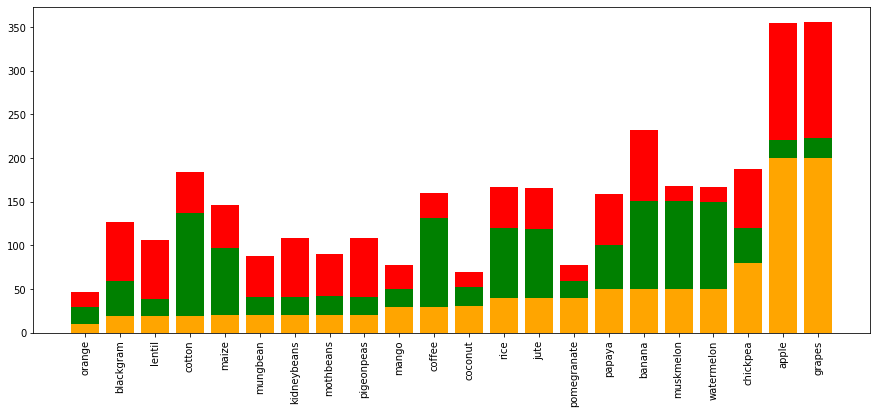

In [115]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df.index, df.K, color='Orange');
plt.bar(df.index, df.N, bottom=df.K, color='Green');
plt.bar(df.index, df.P, bottom=df.N + df.K, color='Red');
plt.xticks(rotation=90);

In [9]:
##Splitting into features(X) and lables(Y)

In [10]:
X = data.drop('label',axis = 1)
Y = data[['label']]

In [11]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [12]:
Y.head()

,label
0,rice
1,rice
2,rice
3,rice
4,rice


In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [58]:
model=[]
score=[]

In [116]:
logreg= LogisticRegression()
cv_score=cross_val_score(logreg,X,Y,cv=5)
score.append(cv_score.mean())
model.append('logistic_regression')

C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataCo

In [67]:
logreg= LogisticRegression(multi_class='multinomial',solver='lbfgs')
cv_score=cross_val_score(logreg,X,Y,cv=5)
score.append(cv_score.mean())
model.append('logistic_regression_multi_class')

C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\utils\validatio

In [70]:
dt=DecisionTreeClassifier(random_state=1)
cv_score=cross_val_score(dt,X,Y,cv=5)
model.append('Decision Tree')
score.append(cv_score.mean())

In [71]:
rf=RandomForestClassifier(random_state=1)
cv_score=cross_val_score(rf,X,Y,cv=5)
model.append('Random Forest')
score.append(cv_score.mean())

C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

In [72]:
svm=SVC()
cv_score=cross_val_score(svm,X,Y,cv=5)
model.append('SVM')
score.append(cv_score.mean())

C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

In [75]:
knn=KNeighborsClassifier()
cv_score=cross_val_score(knn,X,Y,cv=5)
model.append('KNN')
score.append(cv_score.mean())

C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

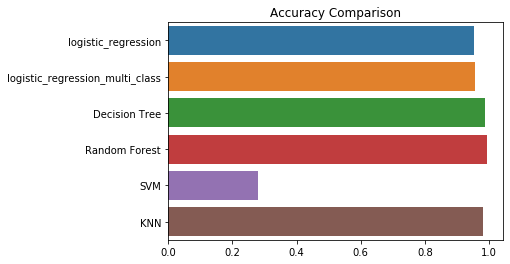

In [78]:
sns.barplot(y=model,x=score)
plt.title('Accuracy Comparison')
plt.show()

HyperParameter tunning


In [92]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [104]:
rf=RandomForestClassifier(random_state=1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd=clf_rf_rnd.fit(X,Y)
print("best_score: " +str(best_clf_rf_rnd.best_score_))
print("best_params: " +str(best_clf_rf_rnd.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.3min finished
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best_score: 0.995
best_params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


In [102]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [50,100,150,200,250],
               'criterion':['gini','entropy'],
                                  'bootstrap': [False],
                                  'max_depth': [8,10,13,15],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [4,5,6,7]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X,Y)
print("best_score: " +str(best_clf_rf.best_score_))
print("best_params: " +str(best_clf_rf.best_params_))

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  3.7min finished
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best_score: 0.995
best_params: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}


In [105]:
model.append("Random Forest Tunned")
score.append(best_clf_rf.best_score_)

C:\Users\jayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


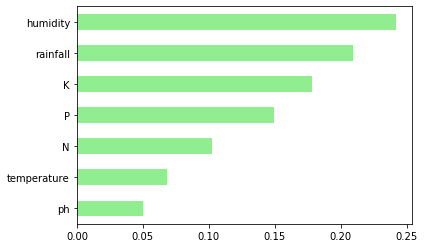

In [98]:
best_rf = best_clf_rf.best_estimator_.fit(X_train,Y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh',color='Lightgreen')
plt.show()

In [101]:
svc = SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [0.001,.01,0.1,1],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.001, .01, .1, 1, 10]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X,Y)
print("best_score: " +str(best_clf_svc.best_score_))
print("best_params: " +str(best_clf_svc.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 110 out of 125 | elapsed:    4.1s remaining:    0.5s


best_score: 0.9868181818181818
best_params: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.6s finished
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
model.append("SVM tunned")
score.append(best_clf_svc.best_score_)

In [103]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X,Y)
print("best_score: " +str(best_clf_knn.best_score_))
print("best_params: " +str(best_clf_knn.best_params_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


best_score: 0.9831818181818182
best_params: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.7s finished
C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [106]:
model.append("KNN tunned")
score.append(best_clf_knn.best_score_)

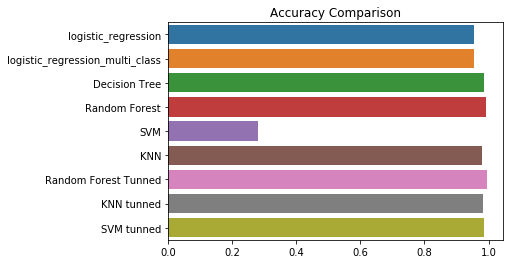

In [109]:
sns.barplot(y=model,x=score)
plt.title('Accuracy Comparison')
plt.show()

In [110]:
dict(zip(model,score))

{'logistic_regression': 0.9531818181818181,
 'logistic_regression_multi_class': 0.9550000000000001,
 'Decision Tree': 0.9872727272727273,
 'Random Forest': 0.9927272727272728,
 'SVM': 0.27999999999999997,
 'KNN': 0.9795454545454545,
 'Random Forest Tunned': 0.995,
 'KNN tunned': 0.9831818181818182,
 'SVM tunned': 0.9868181818181818}

In [81]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        29
        jute       0.96      1.00      0.98        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        15
      papaya       1.00    

C:\Users\jayan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
import pickle
filename='RandomForesttunned.pkl'
Random_Forest_pkl=open(filename,'wb')
pickle.dump(best_clf_rf.best_estimator_,Random_Forest_pkl)
Random_Forest_pkl.close()